In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',200)

In [3]:
df1 = pd.read_excel('Live_Tables_1006-1009.ods',sheet_name=4,header=1,na_values='..')
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,CurrentONS code,Lower and Single Tier Authority Data,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,1997-98,...,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England,NaN,NaN,25705,57023,48941,52190,56949,42465,35780,...,37677,17580,10924,9331,6798,5814,6742,6337,6735,5955
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
years = list(range(1992,2022))
df2 = df1.loc[:,('Unnamed: 1','Unnamed: 2')]
df2.rename(columns={'Unnamed: 1':'LA_code','Unnamed: 2':'LA'},inplace=True)
df2.head(20)

,LA_code,LA
0,NaN,NaN
1,CurrentONS code,Lower and Single Tier Authority Data
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,E12000001,NaN
6,NaN,NaN
7,E07000157,Alnwick
8,E07000158,Berwick-upon-Tweed
9,E07000159,Blyth Valley


In [6]:
columns = []
for x in range(3,33):
    columns.append(f'Unnamed: {x}')
for x in range(len(years)):
    df2[years[x]] = df1[columns[x]]

In [7]:
df2 = df2[~df2.loc[:,'LA'].isnull()]
df2.drop(index=[1,431,433],inplace=True)
df2.reset_index(drop=True,inplace=True)

In [8]:
df2.tail(30)
# what do null values mean?

,LA_code,LA,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
370,E07000050,North Dorset,20,109,54,52,95,158,93,51,...,101,5,36,40,26,0,0,0,NaN,NaN
371,E06000024,North Somerset,0,0,8,0,0,46,91,25,...,1,59,42,42,30,16,25,0,73,30
372,E07000231,North Wiltshire,42,139,114,115,86,38,163,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,E07AHS438,Northavon,0,20,53,108,126,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,E07000023,Penwith,22,93,16,71,80,108,141,155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,E06000026,Plymouth,194,169,250,469,469,166,189,296,...,183,139,41,70,67,7,0,37,24,22
376,E06000029,Poole,57,215,186,288,230,116,184,125,...,1,26,0,6,4,12,1,0,NaN,NaN
377,E07000051,Purbeck,3,161,103,19,75,130,52,142,...,5,0,1,1,0,0,0,0,NaN,NaN
378,E07000024,Restormel,38,110,86,70,95,54,66,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,E07000232,Salisbury,39,121,176,173,194,176,121,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2.shape

(400, 32)

In [10]:
df2 = pd.melt(df2,id_vars=['LA_code','LA'],var_name='year',value_name='new_dwellings')

In [11]:
df2.shape

(12000, 4)

In [12]:
df2[df2.loc[:,'LA']=='Coventry']

,LA_code,LA,year,new_dwellings
147,E08000026,Coventry,1992,102
547,E08000026,Coventry,1993,231
947,E08000026,Coventry,1994,378
1347,E08000026,Coventry,1995,271
1747,E08000026,Coventry,1996,203
2147,E08000026,Coventry,1997,86
2547,E08000026,Coventry,1998,127
2947,E08000026,Coventry,1999,193
3347,E08000026,Coventry,2000,190
3747,E08000026,Coventry,2001,99


In [17]:
years = pd.to_datetime(df2.year, format='%Y')
df2['date'] = years
df2.head()

,LA_code,LA,year,new_dwellings,date
0,E07000157,Alnwick,1992,44,1992-01-01
1,E07000158,Berwick-upon-Tweed,1992,5,1992-01-01
2,E07000159,Blyth Valley,1992,16,1992-01-01
3,E07000160,Castle Morpeth,1992,8,1992-01-01
4,E07000054,Chester-le-Street,1992,0,1992-01-01


In [18]:
df_cov = df2[df2.loc[:,'LA']=='Coventry']
df_cov

,LA_code,LA,year,new_dwellings,date
147,E08000026,Coventry,1992,102,1992-01-01
547,E08000026,Coventry,1993,231,1993-01-01
947,E08000026,Coventry,1994,378,1994-01-01
1347,E08000026,Coventry,1995,271,1995-01-01
1747,E08000026,Coventry,1996,203,1996-01-01
2147,E08000026,Coventry,1997,86,1997-01-01
2547,E08000026,Coventry,1998,127,1998-01-01
2947,E08000026,Coventry,1999,193,1999-01-01
3347,E08000026,Coventry,2000,190,2000-01-01
3747,E08000026,Coventry,2001,99,2001-01-01


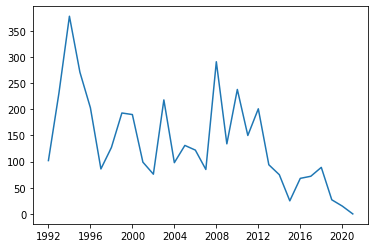

In [21]:
x = df_cov['date']
y = df_cov['new_dwellings']
plt.plot(x,y)

In [13]:
df2.to_excel('Socially Rented Dwellings by LA, 1992-2021.xlsx')